In [27]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs

import sys
sys.path.append('/Users/clementinechazal/Documents/these/kernel_path')
import functions as fc

In [83]:
n = 300
d = 2

Mu = [-5*np.ones(2), 5*np.ones(2)]
Sigma = [np.identity(2), np.identity(2)]
p = [1/2, 1/2]

# Mu = [-5*np.ones(2), 5*np.ones(2),np.array([-5,5]),np.array([5,-5])]
# Sigma = [np.identity(2), np.identity(2),np.identity(2),np.identity(2)]
# p = [1/4, 1/4,1/4,1/4]

X1 =fc.mixt_gauss(Mu, Sigma, n, p)
mask = (X1[:, 0] > 1) & (X1[:, 1] > 1)
mask_inv = ~mask

# Mu = [ 3* np.ones(2)]
# Sigma = [np.identity(d)]
# p = [1]
# X1 =fc.mixt_gauss(Mu, Sigma, n, p) # Samples from the target distribution pi_1, a mixture of 2 gaussians

In [84]:
sigma = 4
k = lambda x,y : fc.k_gauss(x,y,sigma)
dk = lambda x,y : fc.dk_gauss(x,y,sigma)
ddk = lambda x,y : fc.ddk_gauss(x,y,sigma)

# k = lambda x,y : fc.k_linear(x,y)
# dk = lambda x,y : fc.dk_linear(x,y)
# ddk = lambda x,y : fc.ddk_linear(x,y)

In the next cell we derive the vector field $v_t$ for $t = \tau,...,T= K\times \tau$ of the Ornstein Uhlenbeck marginals using the OU dynamics (Z) from the target $\pi_1$ to a gaussian $\gamma^d$. The particules noted X are not necessar to derive $v_t$, they only aim at checking that the dynamic induced by the vector fields $v_t$ reproduced OU process, which is not the case for the moment... 

iter0
157.24730289500363
3.8497600269187755

131.14099495182262
5.780232734840955

108.9499657637274
5.231359805267606

81.82172203216044
7.386776851361491

71.49498629136718
7.3970502502293485

iter5
79.2787172456557
5.101956614362647

49.51858615518451
5.955901274983213

59.60087602557515
5.328623392288268

55.507279793739215
3.8377069174692586

53.31178650013174
4.362180684545271

iter10
51.002301021562644
5.877993911969067

50.19423396108664
5.073659877123309

48.62360023394523
3.430100941434446

46.71779636716348
3.598015323231086

32.18814688446196
3.858949847674226

iter15
39.704014778941264
5.1293326694385675

35.66020025891253
3.747816471221431

36.08311069348517
4.7601123751037075

24.89369966875007
3.715564649180745

30.270223799806775
4.2553431668694515

iter20
28.845717700969253
3.9458947432487417

37.540267983911995
4.1747542161544615

26.092214109543395
4.508122021021471

37.49139302218371
4.052339029200535

28.06085770450062
3.787524328628439

iter25
30.51787889651697
4

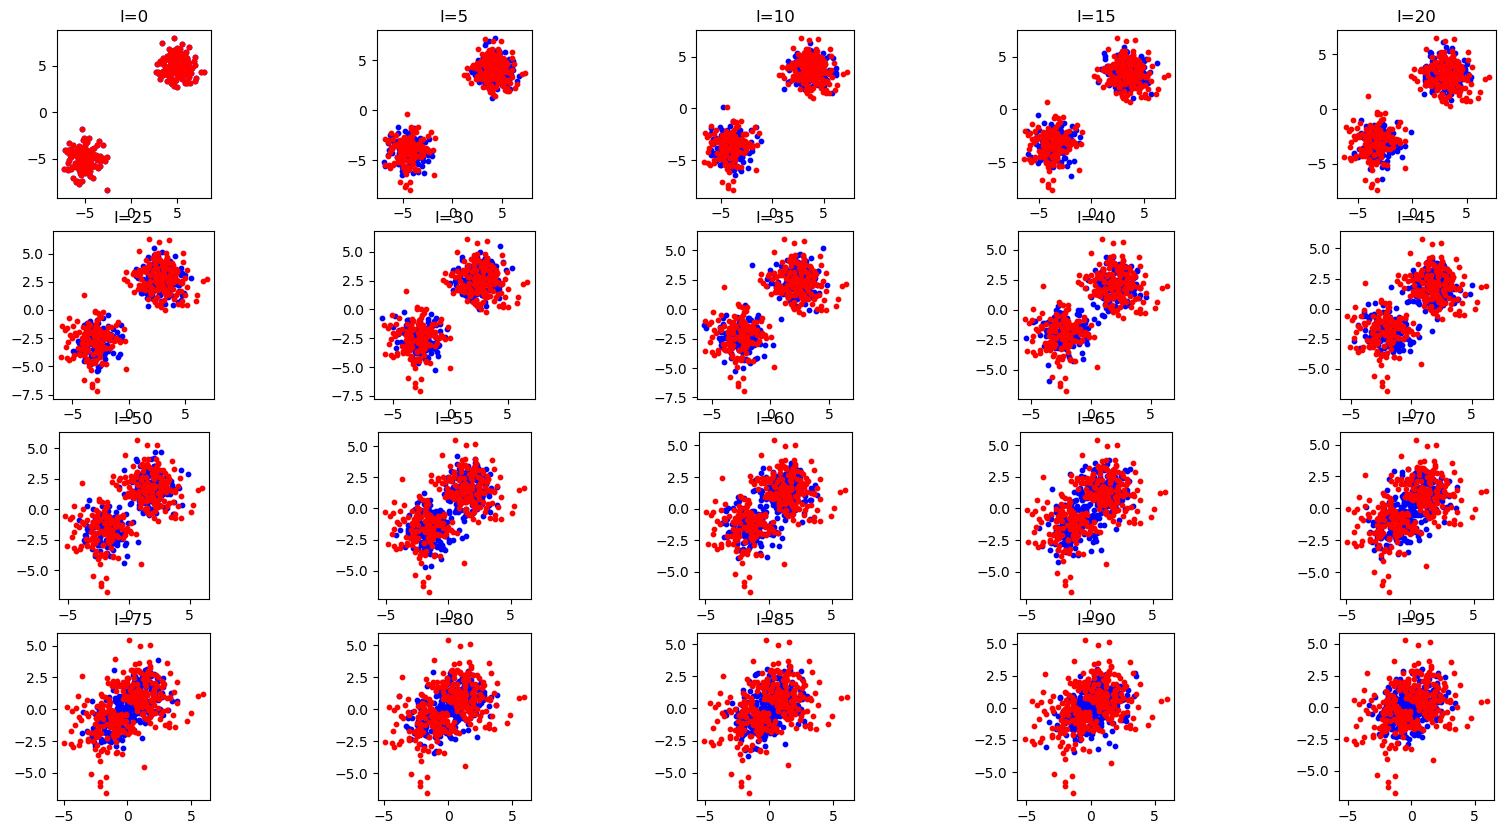

In [87]:
import functions as fc
import importlib
importlib.reload(fc)

V = []
N_iter = 100
t1 = 0.1
tau = 0.02
lambd = 1e-4
X = X1 
Z = X1
Y = X1
L1 = []
L2 = []
fig, axs = plt.subplots(nrows=2*N_iter//50, ncols=5, figsize=(20, N_iter//10))
norm_V_H = []
norm_V_2 = []

xlim = (-4, 4)
ylim = (-4, 4)

for l in range(N_iter):
    t = l * tau + t1
     
    if l%5 == 0:
        print('iter'+str(l))
        ll = l//5
        ax = axs[ll//5, ll%5]
        #ax.scatter(Y[:, 0], Y[:, 1],color = "lightblue",s=10)
        ax.scatter(Z[:, 0], Z[:, 1],color = "blue", label = "OU dynamics",s=10) 
        ax.scatter(X[mask][:, 0], X[mask][:, 1],color = "red", label = r"$X_{t+\tau} = X_{t} + \tau v_t(X_{t})$",s=10)
        ax.scatter(X[mask_inv][:, 0], X[mask_inv][:, 1],color = "red", label = r"$X_{t+\tau} = X_{t} + \tau v_t(X_{t})$",s=10)
        ax.set_title(f'l={l}')
        ax.set_aspect('equal')
        # ax.set_xlim(xlim)
        # ax.set_ylim(ylim)
    #     ax.legend()

    # if l == 50:
    #     sigma = 2 #sigma/1.1#np.sqrt(np.mean(np.linalg.norm(X[:,None,:]-X[None,:,:],axis=2)**2))
    #     #print(sigma)
    #     k = lambda x,y : fc.k_gauss(x,y,sigma)
    #     dk = lambda x,y : fc.dk_gauss(x,y,sigma)
    #     ddk = lambda x,y : fc.ddk_gauss(x,y,sigma)

    # if l == 100:
    #     sigma = 1.5 #sigma/1.1#np.sqrt(np.mean(np.linalg.norm(X[:,None,:]-X[None,:,:],axis=2)**2))
    #     #print(sigma)
    #     k = lambda x,y : fc.k_gauss(x,y,sigma)
    #     dk = lambda x,y : fc.dk_gauss(x,y,sigma)
    #     ddk = lambda x,y : fc.ddk_gauss(x,y,sigma)
    
    

    eps = np.random.randn(n, d)
    psi = fc.psi(X1, eps, t)
    sigma_t = np.sqrt(fc.sigma_2(t))

    Z = np.exp(-t) * X1 + sigma_t * eps #Ornstein-Uhlenbeck dynamics     
    Xi = fc.Xi(Z, eps, k, dk, ddk, t)
    phi = np.linalg.inv(1/n * Xi + lambd * np.identity(n)) @ psi
    score = -1 * eps / sigma_t
    M = lambda x : k(x,Z)[:,:,None] * score[None,:,:] + np.transpose(dk(Z,x), (1,0,2))
    v =  lambda x : 1/n * np.sum(phi[None, :, None] * M(x), axis=1)
    V.append(v)
    norm_V_H.append(np.sqrt(1/n**2 * phi.T @ Xi @ phi))
    norm_V_2.append(np.linalg.norm(v(X)[0]))
    print(np.sqrt(1/n**2 * phi.T @ Xi @ phi))
    print(np.linalg.norm(v(X)[0]))
    print()

    # L1.append(fc.Loss1(v,Z,Mu[0],phi,Xi,t,k,dk,sigma,lambd))
    L2.append(fc.Loss2(v,Z,eps,Mu[0],phi,Xi,psi,t,k,dk,sigma,lambd))

    if l == 0:
        X = X + t1 * v(X) #ou tau + t1 ? 
    else:
        X = X + tau * v(X)
    Y = Z + tau * v(Z)
 

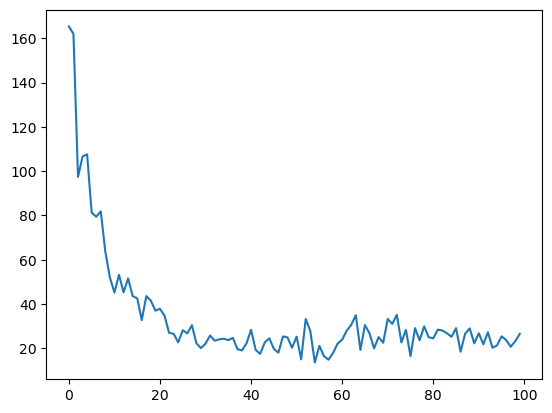

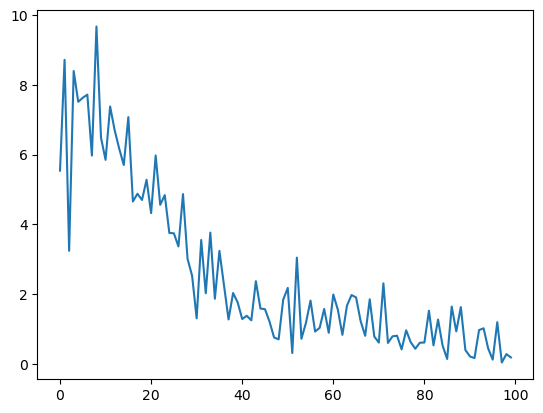

In [63]:
plt.plot(norm_V_H)
plt.figure()
plt.plot(norm_V_2)


In [89]:
# # plt.figure()    
# # #plt.plot(L1[1:]) # eq 3
# # #plt.figure()
# plt.plot(L2[100:]) # eq 5
# plt.show()



In the next cell, we start form a set of particules $Y_j \sim \gamma^d$ and inverse OU process with the objective to recover a sample for $\pi_1$. I doesn't work yet. 

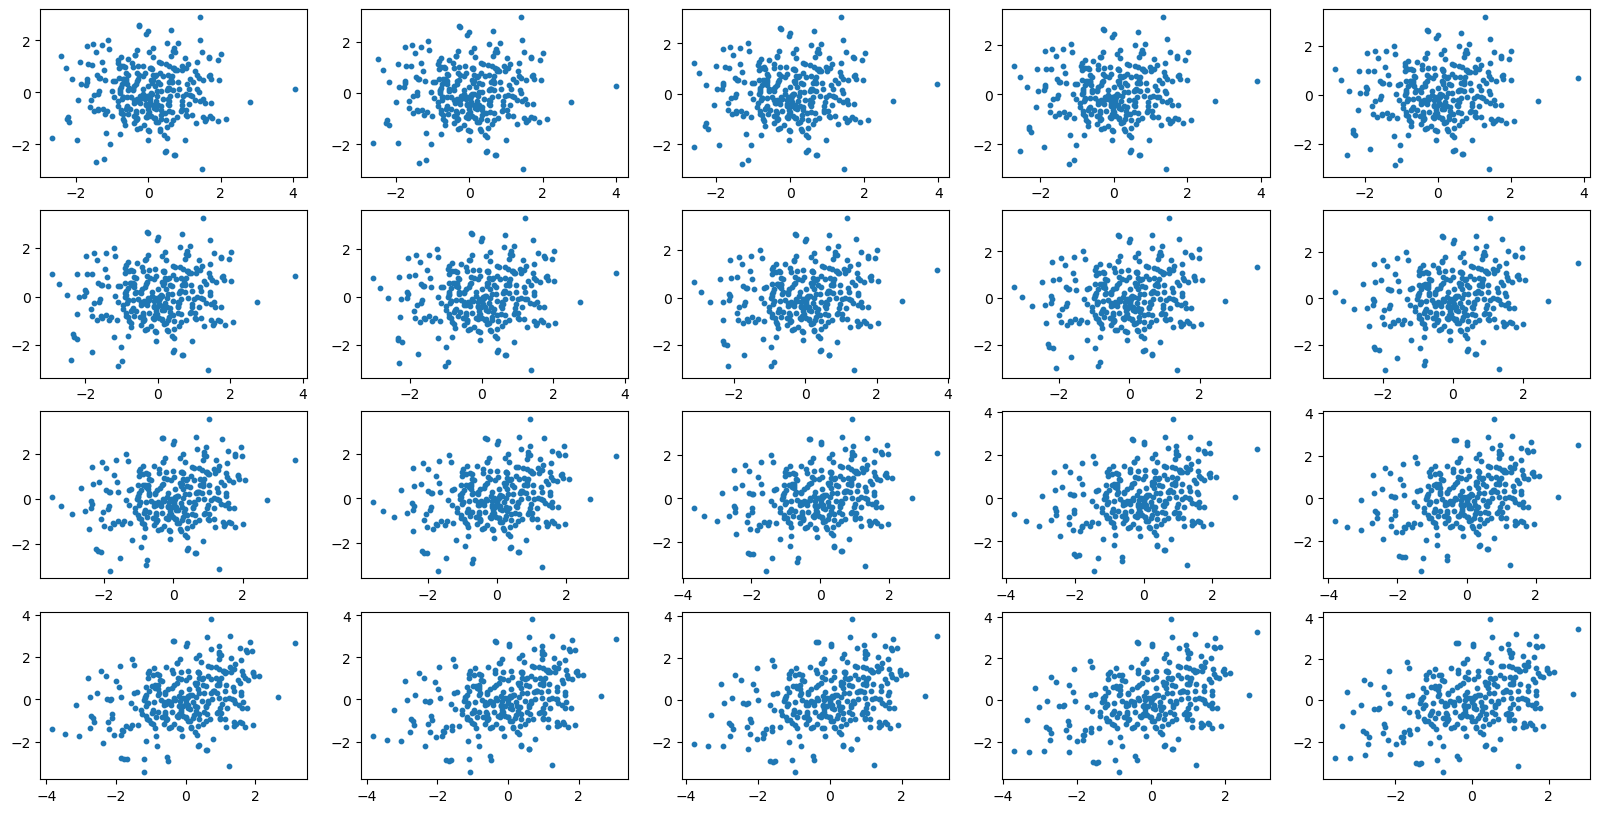

In [88]:
m = 300
Y = scs.multivariate_normal.rvs(np.zeros(d),np.identity(d),m)

fig, axs = plt.subplots(nrows=2*N_iter//50, ncols=5, figsize=(20, N_iter//10))

for i in range(N_iter):
    Y = Y - tau * V[N_iter-1-i](Y)
    #print(np.linalg.norm(V[N_iter-1-i](Y),axis = 1))
    if i % 5 == 0:
        j = i//5
        ax = axs[j//5, j%5]
        ax.scatter(Y[:,0], Y[:,1], s=10)


#plt.scatter(Y[:,0], Y[:,1])
#plt.show()
